https://finance.yahoo.com/calendar/earnings/?day=2023-12-12
Options data for CASY:
Average IV for Calls: 0.3425581726661095
Average IV for Puts: 0.31789832588958744
Total Call Volume: 390.0
Total Call open interest: 2509
Total Call engagement: 2899.0
Total Put Volume: 243.0
Total Put open interest: 1348
Total Put engagement: 1591.0
Number of ITM Call Options: 12
Number of ITM Put Options: 21


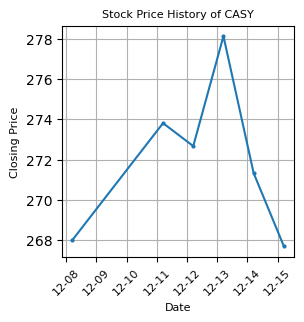

Options data for JCI:
Average IV for Calls: 0.44366420054540934
Average IV for Puts: 0.33824615539574376
Total Call Volume: 5714.0
Total Call open interest: 87889
Total Call engagement: 93603.0
Total Put Volume: 3036.0
Total Put open interest: 26239
Total Put engagement: 29275.0
Number of ITM Call Options: 46
Number of ITM Put Options: 55


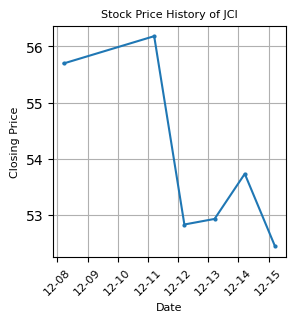

Options data for MDRX:
Average IV for Calls: 1.0651884175109863
Average IV for Puts: 0.7398883004150391
Total Call Volume: 184.0
Total Call open interest: 25867
Total Call engagement: 26051.0
Total Put Volume: 1043.0
Total Put open interest: 24585
Total Put engagement: 25628.0
Number of ITM Call Options: 7
Number of ITM Put Options: 10


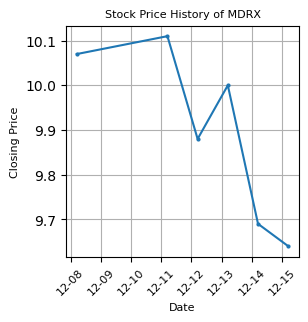

Options data for MDRX:
Average IV for Calls: 1.0651884175109863
Average IV for Puts: 0.7398883004150391
Total Call Volume: 184.0
Total Call open interest: 25867
Total Call engagement: 26051.0
Total Put Volume: 1043.0
Total Put open interest: 24585
Total Put engagement: 25628.0
Number of ITM Call Options: 7
Number of ITM Put Options: 10


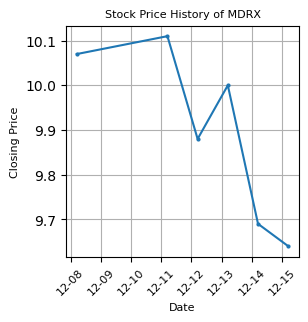

Options data for EPIX:
Average IV for Calls: 1.4347362402343748
Average IV for Puts: 1.3425597108289928
Total Call Volume: 253.0
Total Call open interest: 944
Total Call engagement: 1197.0
Total Put Volume: 41.0
Total Put open interest: 229
Total Put engagement: 270.0
Number of ITM Call Options: 5
Number of ITM Put Options: 2


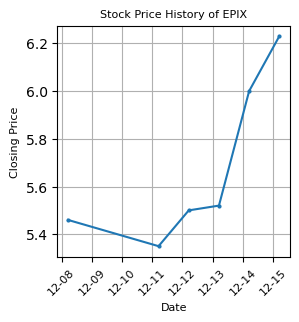

Options data for CSBR:
Average IV for Calls: 1.84896115234375
Average IV for Puts: 1.1951545532226564
Total Call Volume: 15.0
Total Call open interest: 279
Total Call engagement: 294.0
Total Put Volume: 4.0
Total Put open interest: 73
Total Put engagement: 77.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


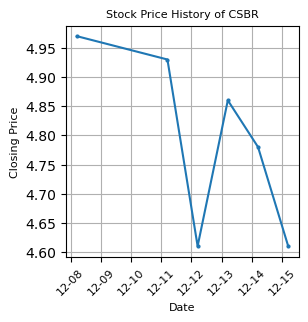

Options data for MAMA:
Average IV for Calls: 0.7528522713216145
Average IV for Puts: nan
Total Call Volume: 87.0
Total Call open interest: 1797
Total Call engagement: 1884.0
Total Put Volume: 45.0
Total Put open interest: 270.0
Total Put engagement: 315.0
Number of ITM Call Options: 3
Number of ITM Put Options: 3


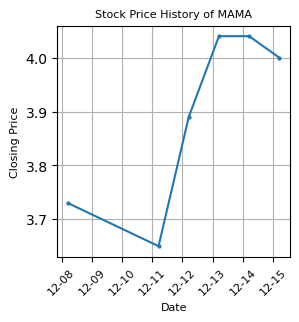

Options data for SST:
Average IV for Calls: 1.6689260587022567
Average IV for Puts: nan
Total Call Volume: 425.0
Total Call open interest: 22577
Total Call engagement: 23002.0
Total Put Volume: 67.0
Total Put open interest: 3489.0
Total Put engagement: 3556.0
Number of ITM Call Options: 0
Number of ITM Put Options: 20


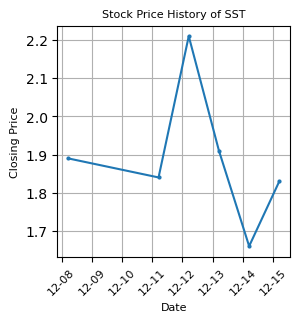

Options data for SST:
Average IV for Calls: 1.6689260587022567
Average IV for Puts: nan
Total Call Volume: 425.0
Total Call open interest: 22577
Total Call engagement: 23002.0
Total Put Volume: 67.0
Total Put open interest: 3489.0
Total Put engagement: 3556.0
Number of ITM Call Options: 0
Number of ITM Put Options: 20


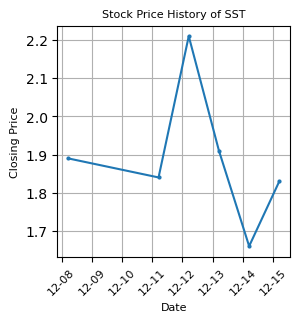

Options data for EMKR:
Average IV for Calls: 1.9921903515625
Average IV for Puts: 3.99219021484375
Total Call Volume: 67.0
Total Call open interest: 144
Total Call engagement: 211.0
Total Put Volume: 1.0
Total Put open interest: 1
Total Put engagement: 2.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3


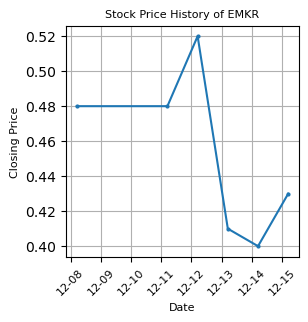

Options data for FRCB:
Average IV for Calls: 5.1881899609375
Average IV for Puts: 0.15740824919871793
Total Call Volume: 518
Total Call open interest: 62937
Total Call engagement: 63455
Total Put Volume: 221.0
Total Put open interest: 9983
Total Put engagement: 10204.0
Number of ITM Call Options: 0
Number of ITM Put Options: 40


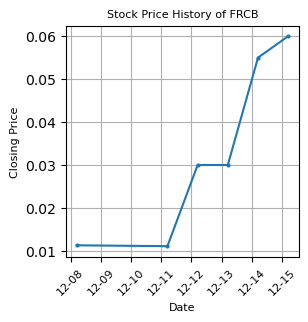

Options data for IRNTQ:
Average IV for Calls: 0.02389510155316607
Average IV for Puts: nan
Total Call Volume: 5.0
Total Call open interest: 1156.0
Total Call engagement: 1161.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 25


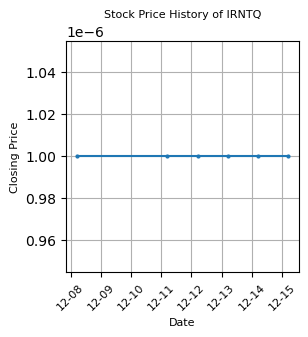

In [2]:
from datetime import datetime, timedelta
from utils import *  
import numpy as np

# Call the function and store the result
day = '2023-12-12'
ticker_data_sorted = scrape_and_process_yahoo_finance_data(day)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date + timedelta(days=4)
start_date = release_date - timedelta(days=4)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get Reality
    reality = analyze_stock_performance_post_earnings(ticker, release_date, start_date, end_date)

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
